In [291]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [292]:
df=pd.read_csv('/content/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## DATA PROCESSING

In [293]:
#removing columns
df=df.drop(columns=['PassengerId','Name','Cabin','Ticket'],axis=1)

In [294]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [295]:
print(df.Sex.value_counts(),'\n',df.Embarked.value_counts())

Sex
male      577
female    314
Name: count, dtype: int64 
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [296]:
df.shape

(891, 8)

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [298]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [299]:
df.dtypes

,0
Survived,int64
Pclass,int64
Sex,object
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked,object


In [300]:
df.nunique()

,0
Survived,2
Pclass,3
Sex,2
Age,88
SibSp,7
Parch,7
Fare,248
Embarked,3


In [301]:
df.count()

,0
Survived,891
Pclass,891
Sex,891
Age,714
SibSp,891
Parch,891
Fare,891
Embarked,889


In [302]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [303]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [304]:
df['Age']=df['Age'].replace(np.nan,df['Age'].median(axis=0))
df['Embarked']=df['Embarked'].replace(np.nan,'S')

In [305]:
df['Sex']=df['Sex'].apply(lambda x:1 if x=='male' else 0)


Categorising in groups i.e. Infant(0-5), Teen (6-20), 20s(21-30), 30s(31-40), 40s(41-50), 50s(51-60), Elder(61-100)

In [306]:
df['Age']=pd.cut(x=df['Age'],bins=[0,5,20,30,40,50,60,100],labels= ['Infant', 'Teen', '20s', '30s', '40s', '50s', 'Elder'])

## EDA

Plotting the Countplot to visualize the numbers

/tmp/ipython-input-307-918778479.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Survived', data = df, ax= ax[0,0],palette='Set1')
/tmp/ipython-input-307-918778479.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Pclass', data = df, ax=ax[0,1],palette='Set1')
/tmp/ipython-input-307-918778479.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Sex', data = df, ax=ax[0,2],palette='Set1')
/tmp/ipython-input-307-918778479.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remove

<Axes: xlabel='Parch', ylabel='count'>

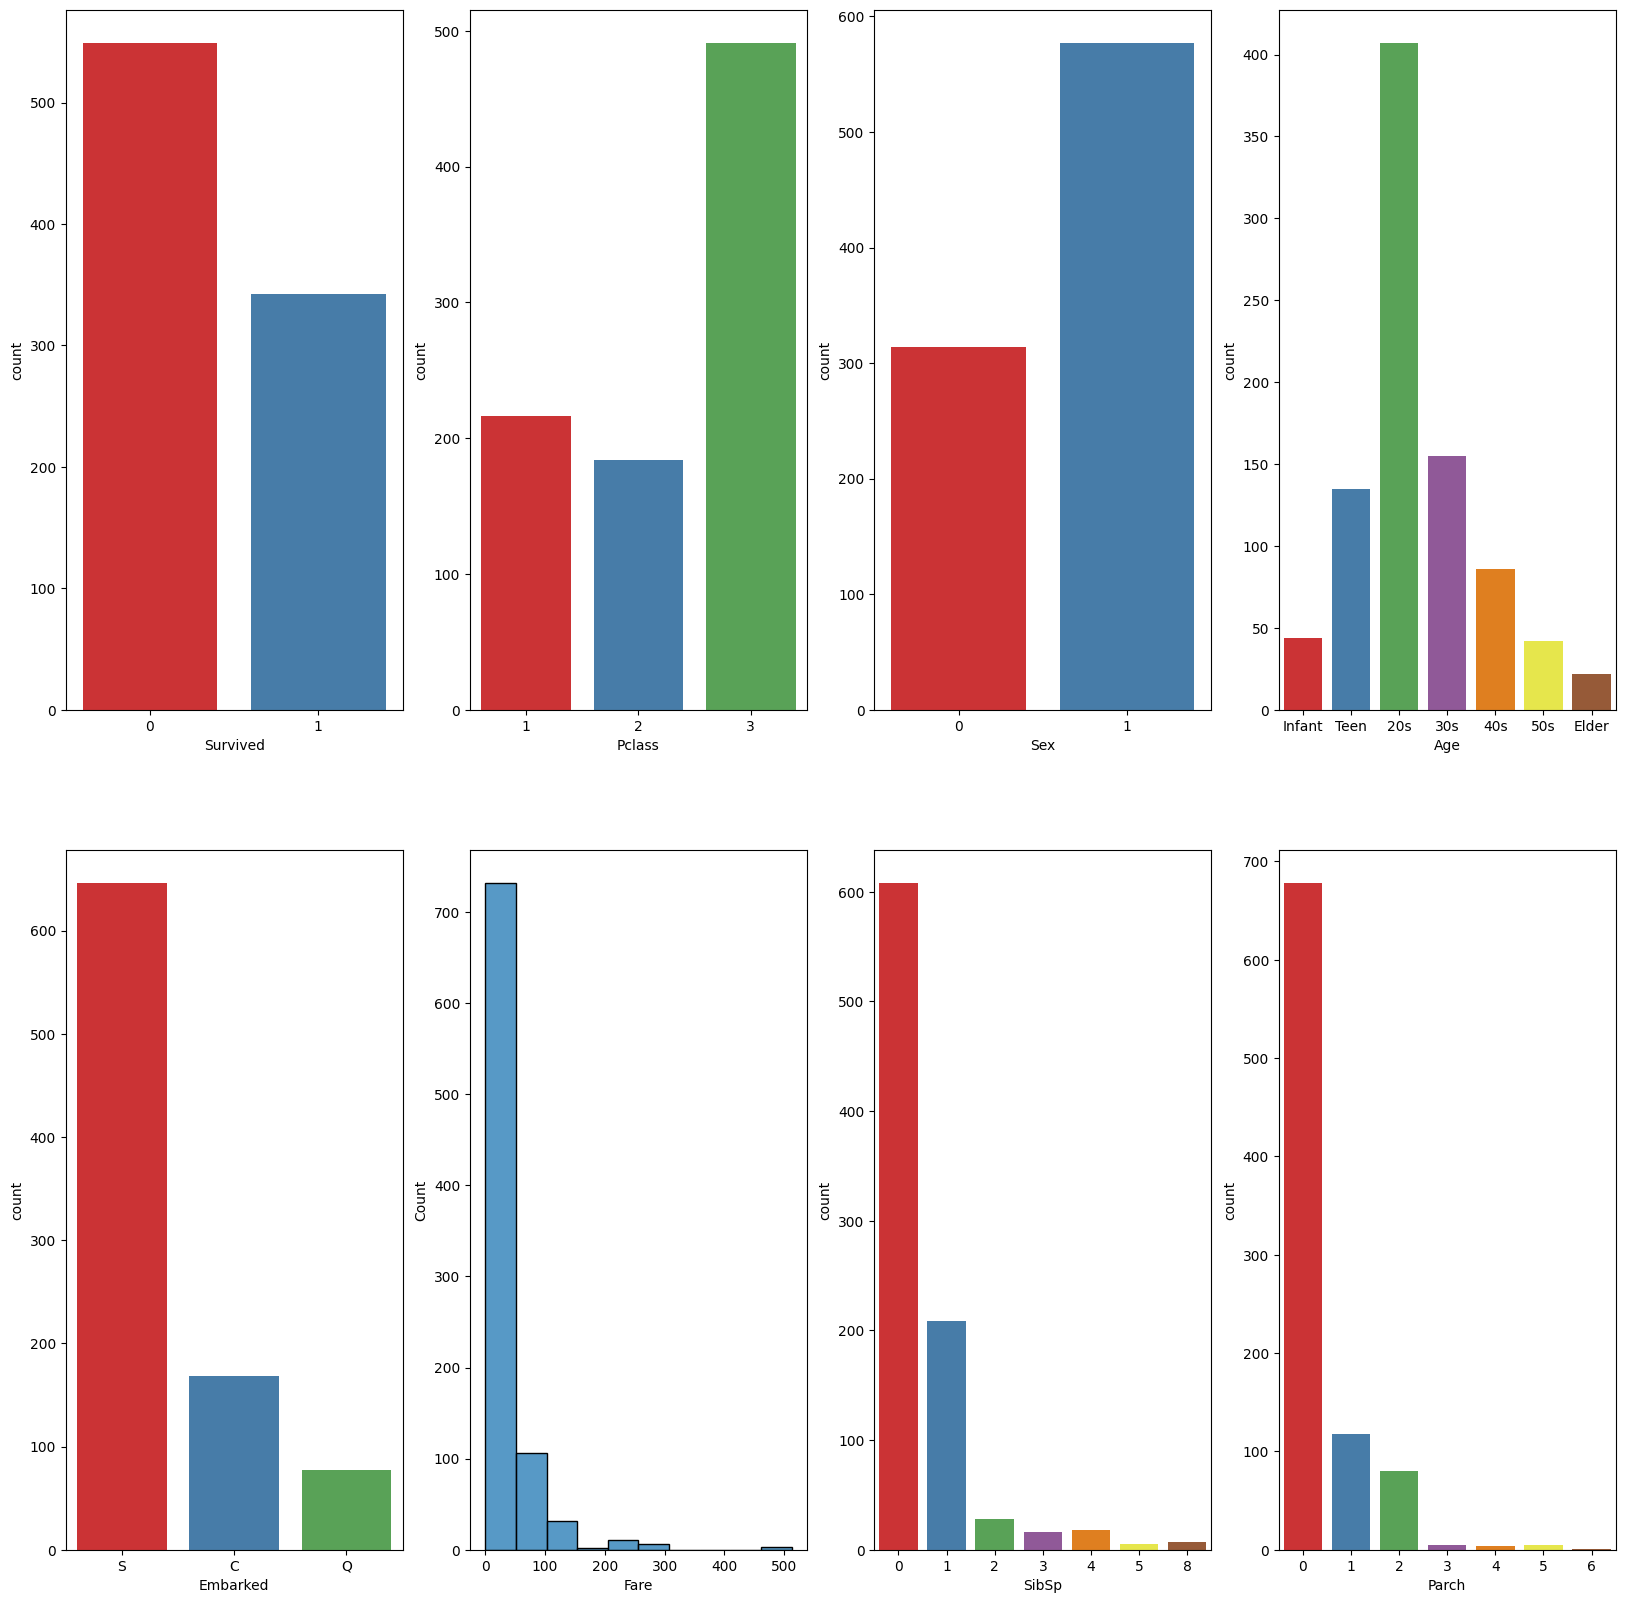

In [307]:
fig,ax=plt.subplots(2,4,figsize=(20,20))
sns.countplot(x = 'Survived', data = df, ax= ax[0,0],palette='Set1')
sns.countplot(x = 'Pclass', data = df, ax=ax[0,1],palette='Set1')
sns.countplot(x = 'Sex', data = df, ax=ax[0,2],palette='Set1')
sns.countplot(x = 'Age', data = df, ax=ax[0,3],palette='Set1')
sns.countplot(x = 'Embarked', data = df, ax=ax[1,0],palette='Set1')
sns.histplot(x = 'Fare', data= df, bins=10, ax=ax[1,1],palette='Set1')
sns.countplot(x = 'SibSp', data = df, ax=ax[1,2],palette='Set1')
sns.countplot(x = 'Parch', data = df, ax=ax[1,3],palette='Set1')

Visualizing the replationship between the features

<Axes: xlabel='Pclass', ylabel='Survived'>

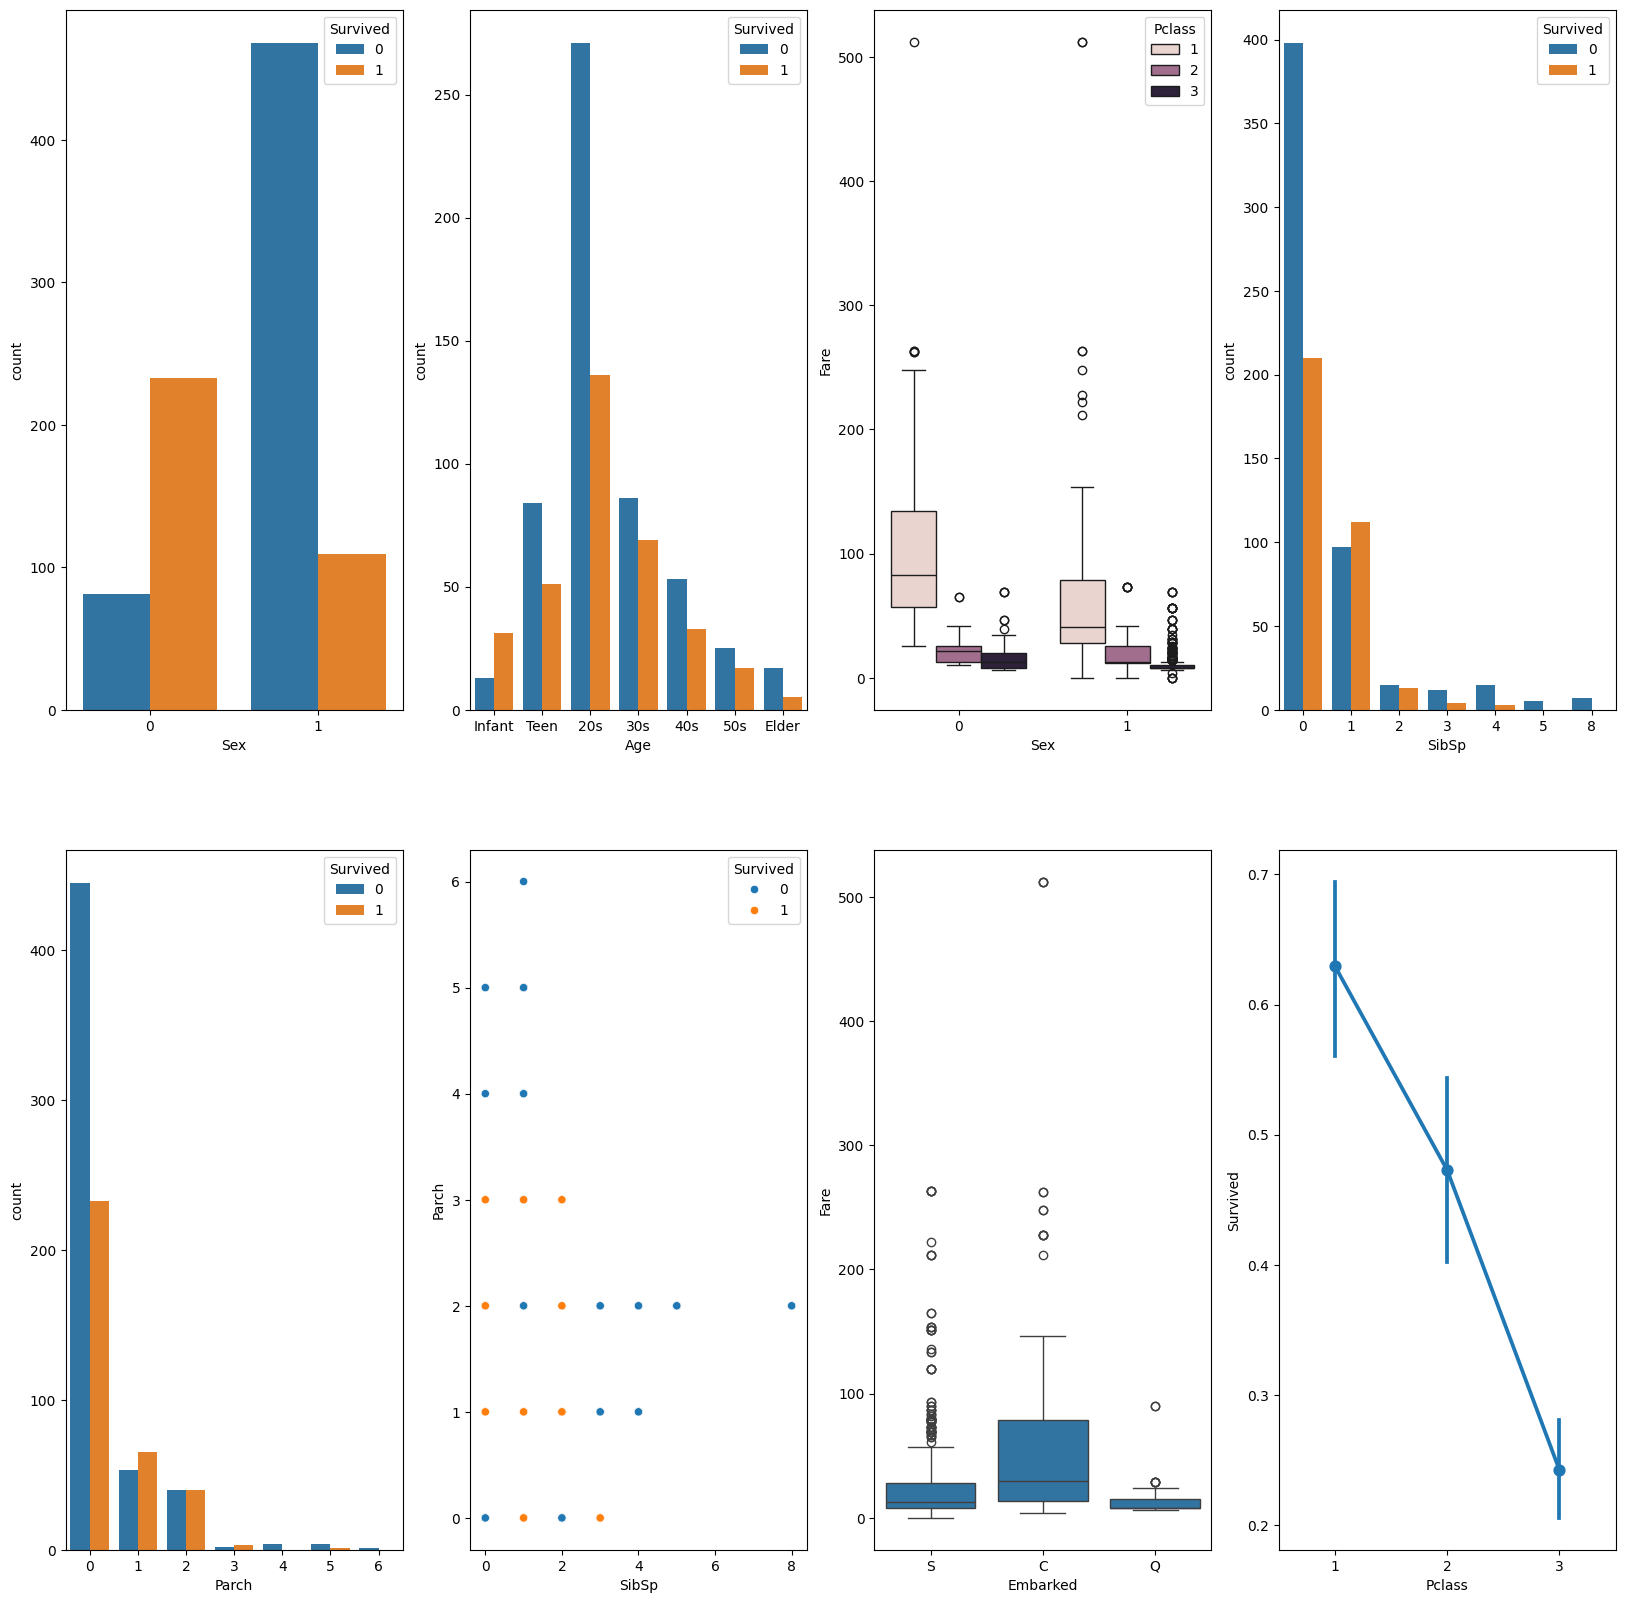

In [308]:
fig, ax = plt.subplots(2,4,figsize=(20,20))
sns.countplot(x = 'Sex', data = df, hue = 'Survived', ax= ax[0,0])
sns.countplot(x = 'Age', data = df, hue = 'Survived', ax=ax[0,1])
sns.boxplot(x = 'Sex',y='Fare', data = df, hue = 'Pclass', ax=ax[0,2])
sns.countplot(x = 'SibSp', data = df, hue = 'Survived', ax=ax[0,3])
sns.countplot(x = 'Parch', data = df, hue = 'Survived', ax=ax[1,0])
sns.scatterplot(x = 'SibSp', y = 'Parch', data = df,hue = 'Survived', ax=ax[1,1])
sns.boxplot(x = 'Embarked', y ='Fare', data = df, ax=ax[1,2])
sns.pointplot(x = 'Pclass', y = 'Survived', data = df, ax=ax[1,3])

## DATA PROCESSING 2

In [309]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [310]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['S','C','Q'])
df['Embarked'] = le.transform(df['Embarked'])

In [311]:
age_mapping={'infant': 0,
    'teen': 1,
    '20s': 2,
    '30s': 3,
    '40s': 4,
    '50s': 5,
    'elder': 6}
df['Age']=df['Age'].map(age_mapping)
df.dropna(subset=['Age'], axis= 0, inplace = True)

Coorelation Heatmap

<Axes: >

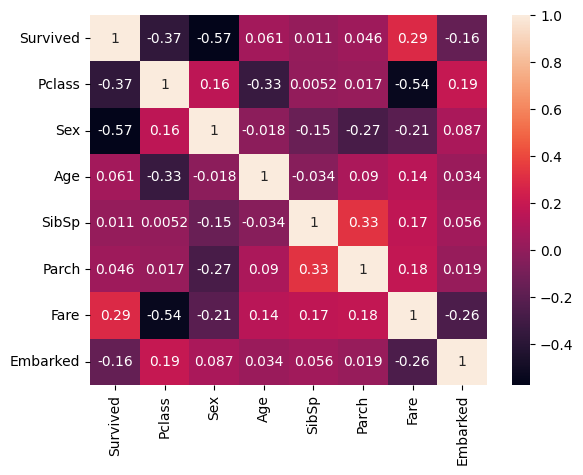

In [312]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

Separating the target and independent variable


In [313]:
x=df.drop(columns=['Survived'])
y=df['Survived']

## Model Training

Logistic Regression

In [314]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr

LogisticRegression()

In [315]:
print(df.Sex.value_counts(),'\n',df.Embarked.value_counts())

Sex
1    456
0    234
Name: count, dtype: int64 
 Embarked
2    492
0    133
1     65
Name: count, dtype: int64


In [316]:
print(x.dtypes)


Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object


In [317]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,2.0,1,0,7.2500,2
1,1,1,0,3.0,1,0,71.2833,0
2,1,3,0,2.0,0,0,7.9250,2
3,1,1,0,3.0,1,0,53.1000,2
4,0,3,1,3.0,0,0,8.0500,2


In [318]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [319]:
lr.fit(x,y)
lr.score(x,y)

0.8173913043478261


Decision Tree Classifier

In [320]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree

DecisionTreeClassifier()

In [321]:
dtree.fit(x,y)
dtree.score(x,y)

0.9420289855072463

Support Vector Machine (SVM)

In [322]:
from sklearn.svm import SVC
svm=SVC()
svm

SVC()

In [323]:
svm.fit(x,y)
svm.score(x,y)

0.7028985507246377


K-Nearest Neighbor

In [324]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn

KNeighborsClassifier()

In [325]:
knn.fit(x,y)
knn.score(x,y)

0.8246376811594203

Importing the test set

In [336]:
df2=pd.read_csv('/content/train.csv')
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Data Preprocessing the Test set

In [337]:
df2['Age']=df2['Age'].replace(np.nan,df2['Age'].median(axis=0))
df2['Embarked']=df2['Embarked'].replace(np.nan,'S')

In [338]:
df2['Age']=df2['Age'].astype(int)

In [339]:
df2['Sex']=df2['Sex'].apply(lambda x:1 if x=='male' else 0)

In [340]:
df2['Age']=pd.cut(x=df2['Age'],bins=[0,5,20,30,40,50,60,100],labels=[0,1,2,3,4,5,6])

In [341]:
df2['Embarked']=le.fit_transform(df2['Embarked'])

In [342]:
df2.dropna(subset=['Age'],axis=0,inplace=True)

In [343]:
df2 = df2.drop(columns=['PassengerId','Name','Cabin','Ticket'], axis= 1)

In [344]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,2,1,0,7.2500,2
1,1,1,0,3,1,0,71.2833,0
2,1,3,0,2,0,0,7.9250,2
3,1,1,0,3,1,0,53.1000,2
4,0,3,1,3,0,0,8.0500,2


Separating the traget and independent variable

In [345]:
x = df2.drop(columns=['Survived'])
y = df2['Survived']


Predicting using Decision Tree Classifier

In [346]:
tree_pred = dtree.predict(x)

In [347]:
from sklearn.metrics import accuracy_score
accuracy_score(y,tree_pred)

0.8981900452488688


Confusion Matrix

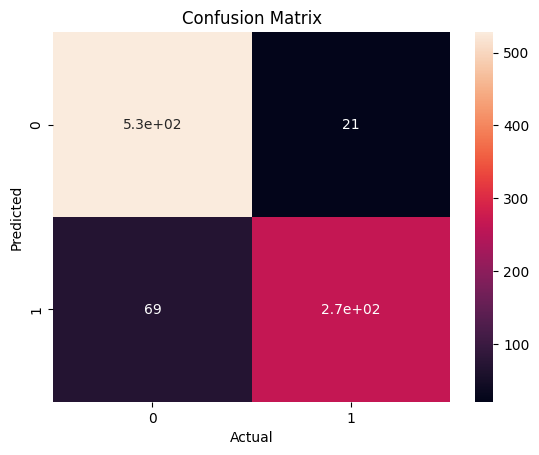

In [349]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y,tree_pred),annot=True)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()